# Lecture 24: Image Classification and the MNIST Digits Dataset

### Please note: This lecture will be recorded and made available for viewing online. If you do not wish to be recorded, please adjust your camera settings accordingly. 

# Reminders/Announcements:
- Done with homework!
- Please do CAPES!
    - If we get 75% completion by Monday, then Wednesday and Friday's lectures will be cancelled (with free participation points for each) and that time can be spent presenting/working on your final projects.
- Final Project "examples" from last year available
    - Warning: I make no claims that these are "perfect" projects (in particular, they are missing participation checks, etc.) but I think the presentations are quite good
- Some final project remarks:
    - If you have tried getting in touch with your groupmates and have had no response, please email me
    - I recommend *making a plan* with your groupmates by the end of next week (things will be collected on Wednesday of finals week, so presentations should occur *before* then)

## MNIST

The *Modified National Institute of Standards and Technology* (MNIST) database is a large collection of data that can be used for training and evaluating models in machine learning. Why is this important? Well...think of all of the news articles you have seen recently about self driving cars! For such a car to be safely allowed on the road, it has to have a *very good* image recognition mechanism. Otherwise we are left vulnerable to things like this: 

![](stop.png)

Image extracted from: https://arxiv.org/pdf/1707.08945.pdf

Subtle modifications to street signs can be easily overcome by human drivers. They are *very difficult* for a computer to deal with. 

This lecture will be a brief introduction to image analysis using MNIST's digits dataset (working with this dataset is commonly called the "Hello World" of machine learning)

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

This dataset has split up the explanatory and explained variables into `data` and `target`

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(70000, 784)


In [5]:
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(70000,)


We have 70,000 images, each with 784 features. What do you think these features represent?

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

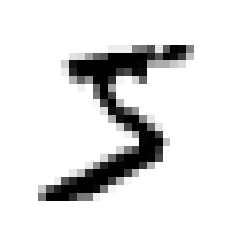

In [7]:
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')
plt.show()

This looks like the digit `5`. How can we make sure?

In [8]:
y[0]

'5'

Note that we already have to do some preprocessing:

In [9]:
type(y[0])

<class 'str'>

In [10]:
y = y.astype(np.uint8)

In [11]:
type(y[0])

<class 'numpy.uint8'>

Let's do a train/test split, so we can evaluate our models:

## ****** Participation Check ****************************

Create new arrays `Xtrain,Xtest,ytrain, and ytest` where the `train` arrays consist of the first 60000 entries in the corresponding dataset and the test entries consist of the last 10000 entries of the corresponding dataset. (Be careful! In the real world you may want to shuffle your dataset first...)

In [12]:
Xtrain, ytrain, Xtest, ytest = X[:60000],y[:60000],X[60000:],y[60000:]

## *******************************************************************

## Binary Classifiers: The Decision Tree

Before we try to classify the 10 digits, let's try a much easier problem: whether or not a digit is 8. To do this we will use a *decision tree*. A decision tree is a machine learning model which asks a bunch of yes or no questions to come to a conclusion. Think of the game 20 Questions, except the questions are *fixed* every time you play.
<img src="dt.png" alt="drawing" width="700"/>

How does it figure out the best yes/no questions to ask? It tries to *minimize* a quantity called *Gini impurity*. The Gini impurity of a node measures how "mixed" that node is.

<img src="gini.png" alt="drawing" width="700"/>

Thankfully this Gini minimization is all builtin! You can read more here if you want though: https://en.wikipedia.org/wiki/Decision_tree_learning

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 42)  #Initialize a DT
ytrain8 = (ytrain==8)  #Set up the "easier" classification problem
ytest8 = (ytest == 8)  #Set up the "easier" test problem
tree.fit(Xtrain,ytrain8)

DecisionTreeClassifier(random_state=42)

In [14]:
tree.predict(X[:20])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False])

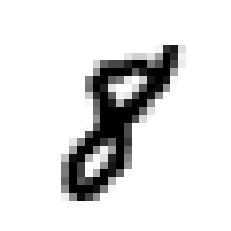

In [15]:
some_digit = X[17]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')
plt.show()

In [16]:
y[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

Seems pretty good! A more robust test on the accuracy can be found by calling a *confusion matrix*. In general if there are $k$ classes, the confusion matrix will have entry [i,j] equal to the number of times class i was predicted to be class j.

In [17]:
pred = tree.predict(Xtrain)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain8,pred)

array([[54149,     0],
       [    0,  5851]])

It seems like we have a perfect model!!! But...

Be careful!!! You have to always ask yourself how well your model generalizes. Decision trees are *very likely* just going to memorize your training data if you let them run free. If, instead of 20 questions, you played 20000 questions, you would always get the right answer. But your questions would become arbitrary and they would not apply to new scenarios.

In this case our testing error is actually not awful:

In [19]:
pred = tree.predict(Xtest)
confusion_matrix(ytest8,pred)

array([[8867,  159],
       [ 167,  807]])

But we can improve it slightly by "regularizing" the model. The `max_depth` parameter essentially puts a bound on the number of questions you are allowed to ask:

In [20]:
tree = DecisionTreeClassifier(max_depth = 9, random_state = 42)
tree.fit(Xtrain,ytrain8)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [21]:
pred = tree.predict(Xtrain)
confusion_matrix(ytrain8,pred)

array([[53860,   289],
       [  620,  5231]])

In [22]:
pred = tree.predict(Xtest)
confusion_matrix(ytest8,pred)

array([[8902,  124],
       [ 175,  799]])

This looks slightly better, even though we did worse on the training data!

Let's take a look at what we got wrong.

In [23]:
badGuesses = [i for i in range(10000) if pred[i]!=ytest8[i]]
len(badGuesses)

299

In [24]:
badGuesses[:6]

[61, 73, 172, 241, 257, 268]

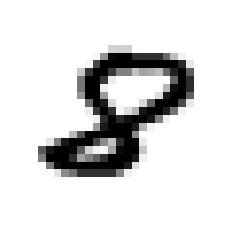

In [25]:
some_digit = Xtest[61]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')
plt.show()

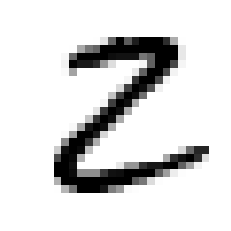

In [26]:
some_digit = Xtest[172]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')
plt.show()

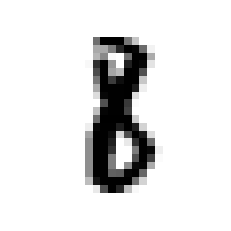

In [27]:
some_digit = Xtest[257]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')
plt.show()

As with the lecture on Information Retrieval, you can define further metrics like *recall*, *precision*, *specificity*, etc. But for now I'll leave it here.

## Predicting Probabilities

We can actually do a bit better with Decision Trees; we can predict the *probability* that something is an 8 or not! The idea is to create the same decision tree, and then when you predict, instead of returning a class, return the *proportion* of a class that is in the corresponding leaf node.

In [28]:
probs = tree.predict_proba(Xtest)
probs[:15]

array([[9.97052995e-01, 2.94700473e-03],
       [9.76625470e-01, 2.33745298e-02],
       [9.99120750e-01, 8.79249707e-04],
       [1.00000000e+00, 0.00000000e+00],
       [9.94038894e-01, 5.96110622e-03],
       [9.99120750e-01, 8.79249707e-04],
       [9.97052995e-01, 2.94700473e-03],
       [9.94038894e-01, 5.96110622e-03],
       [9.76625470e-01, 2.33745298e-02],
       [9.95354730e-01, 4.64527027e-03],
       [9.97052995e-01, 2.94700473e-03],
       [9.76625470e-01, 2.33745298e-02],
       [9.74446337e-01, 2.55536627e-02],
       [1.00000000e+00, 0.00000000e+00],
       [9.99120750e-01, 8.79249707e-04]])

In [29]:
probs[257]

array([0.69620253, 0.30379747])

In [30]:
[probs[i] for i in badGuesses[:10]]

[array([0.99403889, 0.00596111]),
 array([0.12345679, 0.87654321]),
 array([0.01960784, 0.98039216]),
 array([0.01587302, 0.98412698]),
 array([0.69620253, 0.30379747]),
 array([0.997053, 0.002947]),
 array([1., 0.]),
 array([0.16199377, 0.83800623]),
 array([0.2962963, 0.7037037]),
 array([0.98432909, 0.01567091])]

This will allow us to combine several classifiers into one. We have 10 digits in question; this would allow us to create *10 distinct classifiers*, have each compute the probability that something *is* a given digit, and then take the one which maximizes probability!

![](trees.png)

In practice when you do this combination you often use a *softmax*, but I'll leave you with just a reference in case you are interested: https://en.wikipedia.org/wiki/Softmax_function . 

There are various ways of combining binary classifiers to get a *multiclass* classifier, but softmaxing is a common one and a good start.

## Multiclass Classification

Thankfully Decision Trees can natively handle multiclass classification, so we don't actually need to worry about this! As this problem is a bit more complicated, we can afford to let our model ask a few more questions...

In [31]:
tree = DecisionTreeClassifier(max_depth = 13,random_state = 42)
tree.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=13, random_state=42)

In [32]:
pred = tree.predict(Xtest)
cm = confusion_matrix(ytest,pred)

In [33]:
cm

array([[ 929,    0,    9,    6,    3,    9,    8,    3,    9,    4],
       [   4, 1096,    9,    4,    2,    4,    5,    2,    8,    1],
       [  13,   12,  886,   29,   13,   12,   11,   23,   26,    7],
       [   8,    5,   29,  858,    7,   48,    3,   15,   23,   14],
       [   7,    2,   10,    5,  856,    8,   19,    9,   13,   53],
       [  12,   10,    2,   43,    8,  749,   22,   11,   21,   14],
       [  20,    5,   17,   11,   21,   22,  831,    2,   27,    2],
       [   3,   11,   23,   14,    5,    5,    3,  940,    7,   17],
       [  12,   13,   21,   40,   14,   23,   13,   13,  792,   33],
       [  12,    4,   12,   16,   38,   15,    8,   16,   23,  865]])

In [34]:
sum([cm[i,j] for i in range(10) for j in range(10) if i-j])

1198

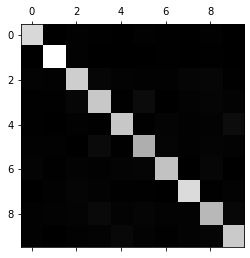

In [35]:
plt.matshow(cm,cmap = plt.cm.gray)
plt.show()

Can we get anything better out of the confusion matrix?

In [36]:
sums = cm.sum(axis=1,keepdims=True)
norm = cm/sums

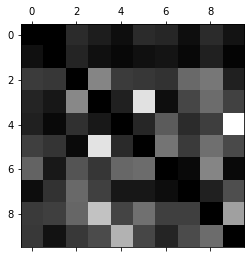

In [37]:
np.fill_diagonal(norm,0)
plt.matshow(norm,cmap=plt.cm.gray)
plt.show()

The lighter squares are common mistakes. 

In [38]:
a,b = 4,9
Xaa = Xtest[(ytest == a) & (pred == a)]
Xab = Xtest[(ytest == a) & (pred == b)]
Xba = Xtest[(ytest == b) & (pred == a)]
Xbb = Xtest[(ytest == b) & (pred == b)]

In [39]:
#Obtained from Aurelien Geron's Github
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")


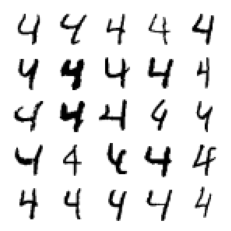

In [40]:
plot_digits(Xaa[:25], 5)

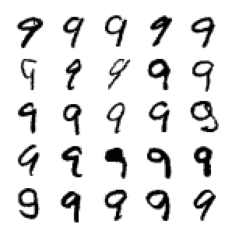

In [41]:
plot_digits(Xbb[:25], 5)

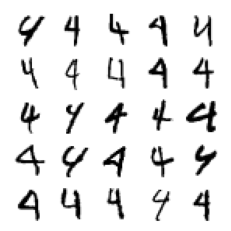

In [42]:
plot_digits(Xab[:25], 5)

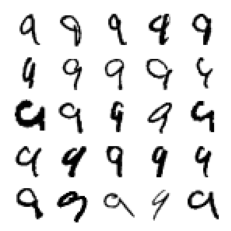

In [43]:
plot_digits(Xba[:25], 5)

## Ensemble Learning and Random Forests

Suppose you have 3 "coins" which flip heads 30% of the time and flip tails 70% of the time. Suppose you play a game: you flip the three coins and if at least two land heads, you mark H; otherwise you mark T. After playing this game 10000 times, how many Ts will you have? 
## ********* Participation Check ***************************
The `random.random()` function gives a "uniform" random number in the interval `[0,1)`. Write a function `flip` which calls `random.random()` and outputs `'H'` if the number is less than .3 and outputs `'T'` otherwise. 

Use `flip` to model the above game and get an approximate answer.

In [52]:
import random
def flip():
    n = random.random()
    if n < .3:
        return('H')
    else:
        return('T')
flip()

'H'

In [53]:
tails = 0
for i in range(10000):
    a,b,c = flip(),flip(),flip()
    t = 0
    for i in (a,b,c):
        if i == 'H':
            t+=1
    if t<=1:
        tails+=1
tails
    

7860

## *******************************************************

The above game is the core idea behind ensemble learning. If you have one model which is correct 90% of the time, you can try to make other models which are "independent" and combine them using majority rules. This can have dramatic effects on your predictive power, while simultaneously *reducing* your risk of overfitting!

The `RandomForestClassifier` essentially does this using decision trees. They create a bunch (100) of decision trees, throw them *all* at the problem simultaneously, and then see which guess seems the best:

In [54]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 42)
forest.fit(Xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [55]:
pred = forest.predict(Xtest)
cm = confusion_matrix(ytest,pred)

In [56]:
cm

array([[ 971,    0,    0,    0,    0,    2,    3,    1,    3,    0],
       [   0, 1127,    2,    2,    0,    1,    2,    0,    1,    0],
       [   6,    0, 1002,    5,    3,    0,    3,    8,    5,    0],
       [   1,    0,    9,  972,    0,    9,    0,    9,    8,    2],
       [   1,    0,    0,    0,  955,    0,    5,    1,    4,   16],
       [   5,    1,    1,    9,    2,  860,    5,    2,    5,    2],
       [   7,    3,    0,    0,    3,    3,  937,    0,    5,    0],
       [   1,    4,   20,    2,    0,    0,    0,  990,    2,    9],
       [   4,    0,    6,    7,    5,    5,    5,    4,  930,    8],
       [   7,    6,    2,   12,   12,    1,    0,    4,    4,  961]])

In [57]:
sum([cm[i,j] for i in range(10) for j in range(10) if i-j])

295

In [0]:
sums = cm.sum(axis=1,keepdims=True)
norm = cm/sums

In [0]:
np.fill_diagonal(norm,0)
plt.matshow(norm,cmap=plt.cm.gray)
plt.show()

## What's Next

Decision Trees and Random Forests are *incredibly powerful* and *approachable* tools. As of 2019, Uber (a somewhat large Taxi service) was using these all over the place: https://eng.uber.com/productionizing-distributed-xgboost/ . If you are serious about ML, this is a great model to really dig into.

If you are *really* serious about ML, then after this you should learn about neural networks (and in particular, convolutional neural networks). One day you might work on something that does this: https://www.youtube.com/watch?v=HS1wV9NMLr8 !